In [1]:
%load_ext autoreload
%autoreload 2

In [20]:
import numpy as np
from scipy import stats

import pymc as pm

from modules.models.chapter_7 import models_comparison_bf, hp_testing_savage_dickey_ratio 
from modules.models.chapter_8 import estimate_mean_difference_one_sample

from modules.utils import validate_model, visualize_samples

In [6]:
PRPC_KWARGS={
    'samples': 1000
}
SAMPLING_KWARGS={
    'draws': 3000,
    'tune': 3000,
}
POPC_KWARGS={
}

# Estimate One Sample Mean

C:\Users\penthotal\Desktop\git_repositories\learning_bayes\books\bayesian_cognitive_modelling\modules\utils.py:33: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(**sampling_kwargs)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [standard_deviation, effect_size]


Sampling 4 chains for 3_000 tune and 3_000 draw iterations (12_000 + 12_000 draws total) took 49 seconds.
C:\Users\penthotal\miniconda3\envs\bayes_env\lib\site-packages\pymc3\sampling.py:1689: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


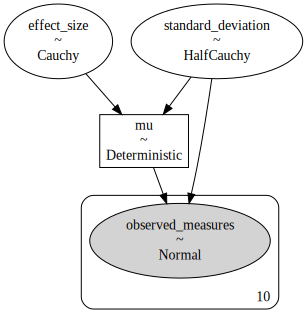

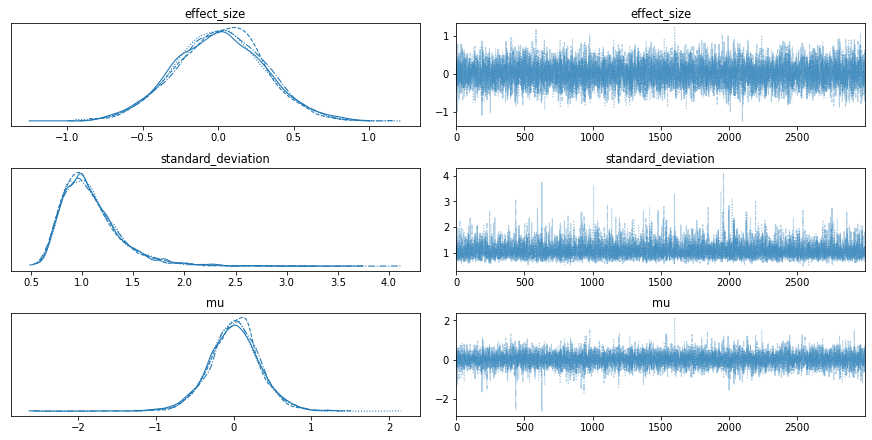

In [28]:
sample_size = 10
observed_diffs = np.random.normal(0, 1, sample_size) - np.random.normal(0, 1, sample_size)

POPC_KWARGS_MEANS={
    'samples': 1000,
    'var_names': ['effect_size', 'observed_measures']
}

model = estimate_mean_difference_one_sample(
    obs_measures=observed_diffs,
    delta_cauchy_kwargs={
        'alpha': 0,
        'beta': 1
    },
    sigma_cauchy_kwargs={
        'beta': 25
    }
)

plate, prpc, trace, popc = validate_model(
    model,
    PRPC_KWARGS,
    SAMPLING_KWARGS,
    POPC_KWARGS_MEANS
)

plate

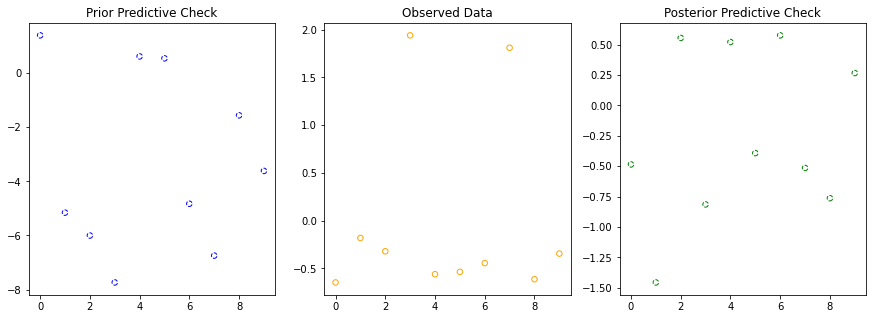

In [29]:
visualize_samples(
    observed=observed_diffs, 
    prpc=prpc['observed_measures'][0, :], 
    popc=popc['observed_measures'][0, :],
    s=30
)

In [30]:
models_p = {
    'one_sample_mean':
        {
            'posterior' : stats.kde.gaussian_kde(popc['effect_size']).pdf(0),
            'prior': stats.kde.gaussian_kde(prpc['effect_size']).pdf(0)
        }
}
hp_testing_savage_dickey_ratio(
    models=models_p
)

{'one_sample_mean': array([33.39900351])}